In [39]:
#%%

#Imports
import numpy as np
import matplotlib.pyplot as plt
import control
import scipy.signal as signal

In [40]:
#%%

#System dynamics
A = np.array([[0,1,0],
              [0,-.875,-20],
              [0,0,-50]])
B = np.array([[0],
              [0],
              [50]])
C = np.array([1,0,0])
D = np.array([0])

L:  [[ -22.875    1377.015625 3353.5     ]]


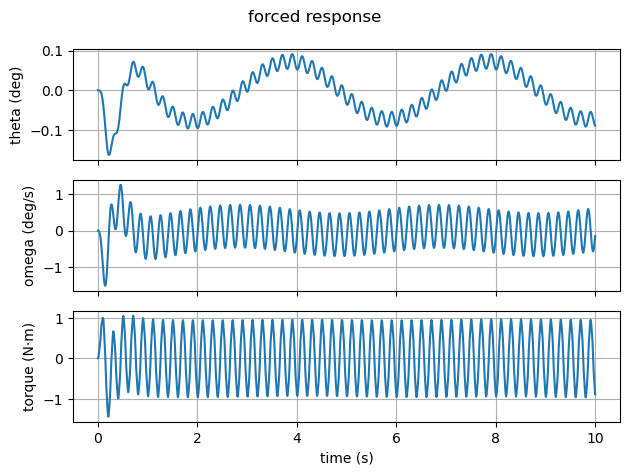

Text(0.5, 0.98, 'error')

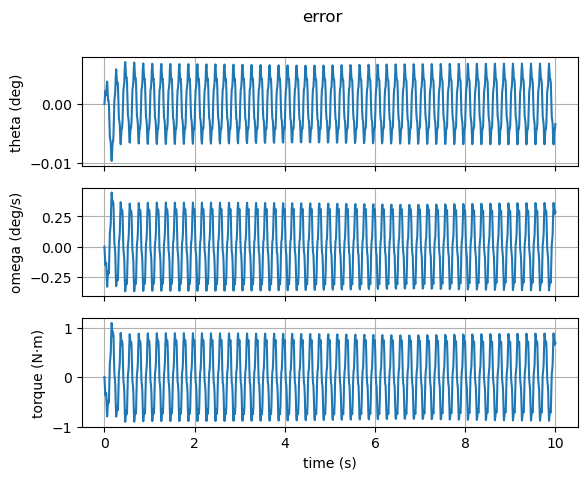

In [41]:
#%%
#%%

#Observer design
p = [-12,-8+1j,-8-1j]
L = control.place(A.T,C.T,p)
print("L: ", L)
K = np.array([-0.05, -0.03351563, -0.7375])

#Combined dynamics
A_cl = np.block([
    [A,           -B @ K.reshape(1, -1)],
    [L.reshape(-1,1) @ C.reshape(1,-1), A - B @ K.reshape(1, -1) - L.reshape(-1,1) @ C.reshape(1,-1)]
])
B_cl = np.block([
    [B,                np.zeros((3,1))],
    [B,                L.reshape(-1,1)]
])
C_cl = np.identity(6)
D_cl = np.zeros((6,2))
P_cl = control.ss(A_cl, B_cl, C_cl, D_cl)
t = np.linspace(0,10,1000)
d = 0.005 * (np.sin(2*np.pi/2/2*t))
n = 0.5 *np.pi/180*(np.sin(2*np.pi/2*10*t)+np.sin(2*np.pi/2*50*t))
u = np.vstack((d,n))


P_cl = control.ss(A_cl, B_cl, C_cl, D_cl)
Tout_cl, Yout_cl = control.forced_response(P_cl, t, u)
error = Yout_cl[0:3,:] - Yout_cl[3:6,:]
#plot on 3x1 plot deg, deg/s, N/m and plot the error x-x_hat
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].plot(Tout_cl, Yout_cl[0,:])
axes[0].set_ylabel('theta (deg)')
axes[0].grid(True)
axes[1].plot(Tout_cl, Yout_cl[1,:])
axes[1].set_ylabel('omega (deg/s)')
axes[1].grid(True)
axes[2].plot(Tout_cl, Yout_cl[2,:])
axes[2].set_ylabel('torque (N·m)')
axes[2].set_xlabel('time (s)')
axes[2].grid(True)
fig.suptitle('forced response')
plt.tight_layout()
plt.show()


#%%

#plot the error
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].plot(Tout_cl, error[0,:])
axes[0].set_ylabel('theta (deg)')
axes[0].grid(True)
axes[1].plot(Tout_cl, error[1,:])
axes[1].set_ylabel('omega (deg/s)')
axes[1].grid(True)
axes[2].plot(Tout_cl, error[2,:])
axes[2].set_ylabel('torque (N·m)')
axes[2].set_xlabel('time (s)')
axes[2].grid(True)
fig.suptitle('error')

Theta has high frequency occilations, it is suseptible to the noise oscillations. The torque error oscillating with an amplitude of 1Nm. The controller is operating on lagging state information from the observer which is leading to the oscillatory output in theta.

L:  [[  14.125     638.640625 1126.25    ]]


Text(0.5, 0.98, 'error')

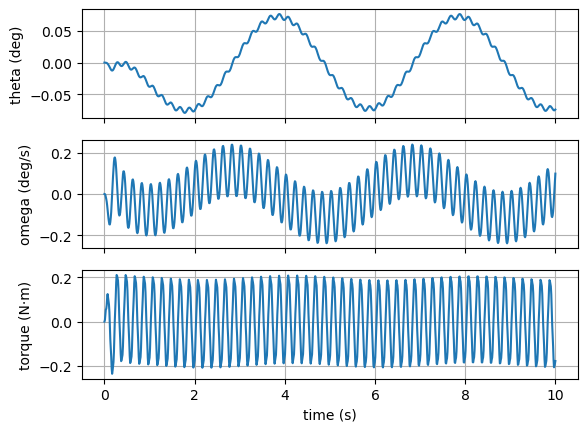

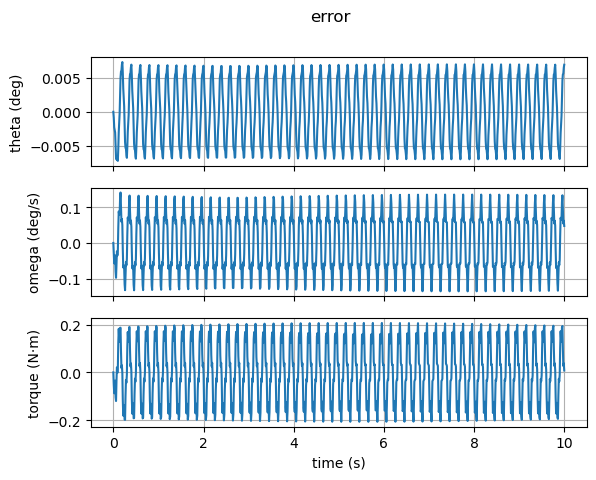

In [42]:

#New observer design
p = [-25,-20+1j,-20-1j]
L = control.place(A.T,C.T,p)
print("L: ", L)
A_cl = np.block([
    [A,           -B @ K.reshape(1, -1)],
    [L.reshape(-1,1) @ C.reshape(1,-1), A - B @ K.reshape(1, -1) - L.reshape(-1,1) @ C.reshape(1,-1)]
])
B_cl = np.block([
    [B,                np.zeros((3,1))],
    [B,                L.reshape(-1,1)]
])
C_cl = np.identity(6)
D_cl = np.zeros((6,2))
P_cl = control.ss(A_cl, B_cl, C_cl, D_cl)
Tout, Yout = control.forced_response(P_cl, t, u)
error = Yout[0:3,:] - Yout[3:6,:]
#plot on 3x1 plot deg, deg/s, N/m and plot the error x-x_hat
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].plot(Tout, Yout[0,:])
axes[0].set_ylabel('theta (deg)')
axes[0].grid(True)
axes[1].plot(Tout, Yout[1,:])
axes[1].set_ylabel('omega (deg/s)')
axes[1].grid(True)
axes[2].plot(Tout, Yout[2,:])
axes[2].set_ylabel('torque (N·m)')
axes[2].set_xlabel('time (s)')
axes[2].grid(True)
#error
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].plot(Tout, error[0,:])
axes[0].set_ylabel('theta (deg)')
axes[0].grid(True)
axes[1].plot(Tout, error[1,:])
axes[1].set_ylabel('omega (deg/s)')
axes[1].grid(True)
axes[2].plot(Tout, error[2,:])
axes[2].set_ylabel('torque (N·m)')
axes[2].set_xlabel('time (s)')
axes[2].grid(True)
fig.suptitle('error')

There are still high frequency oscillations in the theta but the amplitude is lower, there is slightly better noise mitigation. The error in the torque output is also much lower, 0.2Nm

L:  [[  74.125    1386.140625   25.25    ]]


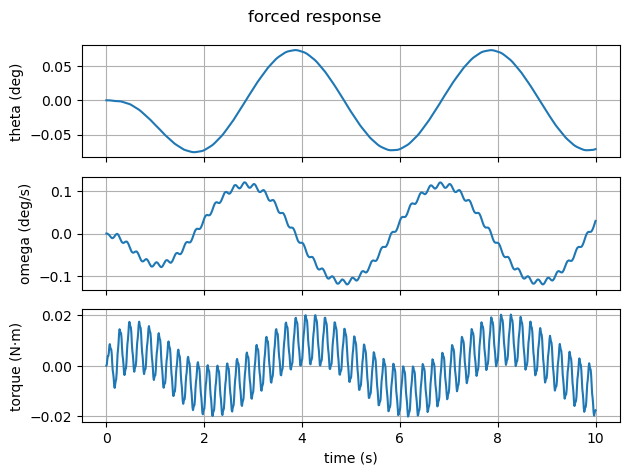

Text(0.5, 0.98, 'error')

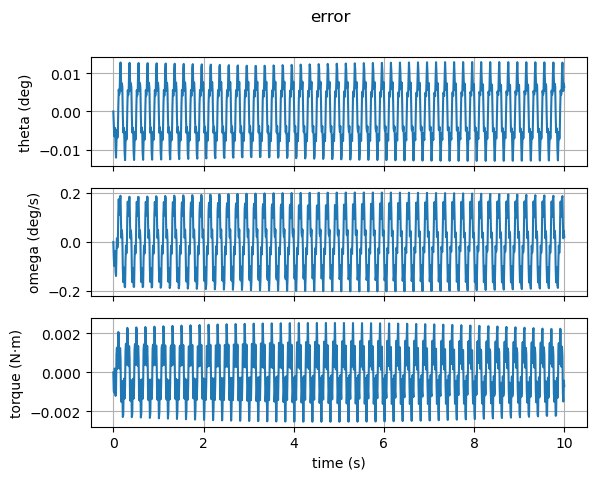

In [43]:
# %%

#New observer design
p = [-45,-40+1j,-40-1j]
L = control.place(A.T,C.T,p)
print("L: ", L)
A_cl = np.block([
    [A,           -B @ K.reshape(1, -1)],
    [L.reshape(-1,1) @ C.reshape(1,-1), A - B @ K.reshape(1, -1) - L.reshape(-1,1) @ C.reshape(1,-1)]
])
B_cl = np.block([
    [B,                np.zeros((3,1))],
    [B,                L.reshape(-1,1)]
])
C_cl = np.identity(6)
D_cl = np.zeros((6,2))
P_cl = control.ss(A_cl, B_cl, C_cl, D_cl)
Tout, Yout = control.forced_response(P_cl, t, u)
error = Yout[0:3,:] - Yout[3:6,:]
#plot on 3x1 plot deg, deg/s, N/m and plot the error x-x_hat
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].plot(Tout, Yout[0,:])
axes[0].set_ylabel('theta (deg)')
axes[0].grid(True)
axes[1].plot(Tout, Yout[1,:])
axes[1].set_ylabel('omega (deg/s)')
axes[1].grid(True)
axes[2].plot(Tout, Yout[2,:])
axes[2].set_ylabel('torque (N·m)')
axes[2].set_xlabel('time (s)')
axes[2].grid(True)
fig.suptitle('forced response')
plt.tight_layout()
plt.show()

#plot the error
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].plot(Tout, error[0,:])
axes[0].set_ylabel('theta (deg)')
axes[0].grid(True)
axes[1].plot(Tout, error[1,:])
axes[1].set_ylabel('omega (deg/s)')
axes[1].grid(True)
axes[2].plot(Tout, error[2,:])
axes[2].set_ylabel('torque (N·m)')
axes[2].set_xlabel('time (s)')
axes[2].grid(True)
fig.suptitle('error')

The theta output is very smooth with no noise present to the naked eye. The error in torque is extremely low, only 0.002 Nm. There is still position error, 0.01 deg, but it is quite low. The error in omega is around 0.2 deg/s which is higher than any of the other trials interestingly. This is still the best due to the smooth output, and low torque error.

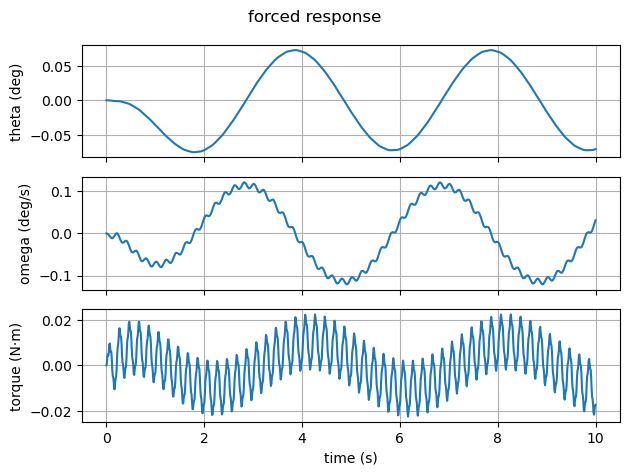

Text(0.5, 0.98, 'error')

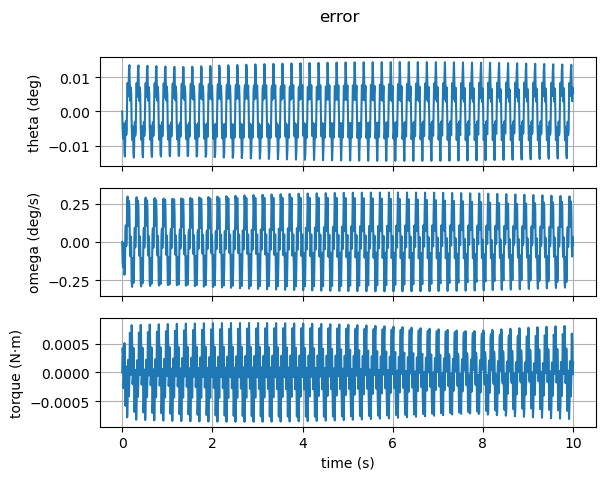

In [44]:
#IGNORE EVERYTHING BELOW, JUST FOR CURIOSITY

#Out of curiosity try even faster observer


p = [-60,-55+1j,-55-1j]
L = control.place(A.T,C.T,p)
A_cl = np.block([
    [A,           -B @ K.reshape(1, -1)],
    [L.reshape(-1,1) @ C.reshape(1,-1), A - B @ K.reshape(1, -1) - L.reshape(-1,1) @ C.reshape(1,-1)]
])
B_cl = np.block([
    [B,                np.zeros((3,1))],
    [B,                L.reshape(-1,1)]
])
C_cl = np.identity(6)
D_cl = np.zeros((6,2))
P_cl = control.ss(A_cl, B_cl, C_cl, D_cl)
Tout, Yout = control.forced_response(P_cl, t, u)
error = Yout[0:3,:] - Yout[3:6,:]
#plot on 3x1 plot deg, deg/s, N/m and plot the error x-x_hat
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].plot(Tout, Yout[0,:])
axes[0].set_ylabel('theta (deg)')
axes[0].grid(True)
axes[1].plot(Tout, Yout[1,:])
axes[1].set_ylabel('omega (deg/s)')
axes[1].grid(True)
axes[2].plot(Tout, Yout[2,:])
axes[2].set_ylabel('torque (N·m)')
axes[2].set_xlabel('time (s)')
axes[2].grid(True)
fig.suptitle('forced response')
plt.tight_layout()
plt.show()

#error
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].plot(Tout, error[0,:])
axes[0].set_ylabel('theta (deg)')
axes[0].grid(True)
axes[1].plot(Tout, error[1,:])
axes[1].set_ylabel('omega (deg/s)')
axes[1].grid(True)
axes[2].plot(Tout, error[2,:])
axes[2].set_ylabel('torque (N·m)')
axes[2].set_xlabel('time (s)')
axes[2].grid(True)
fig.suptitle('error')


Text(0.5, 0.98, 'disturbances and noise')

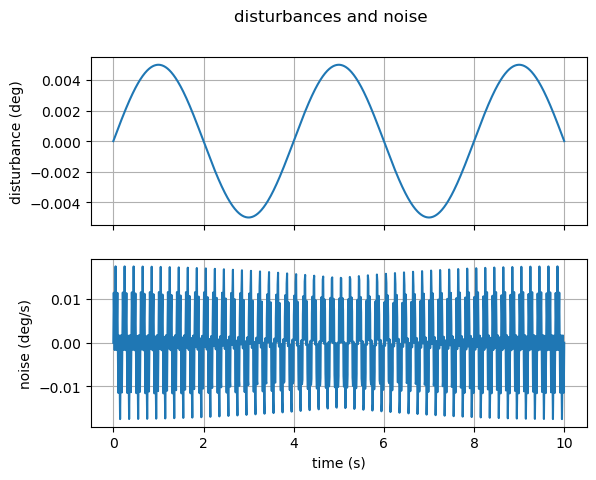

In [45]:
# %%

#plot disturbances and noise
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(Tout, d)
axes[0].set_ylabel('disturbance (deg)')
axes[0].grid(True)
axes[1].plot(Tout, n)
axes[1].set_ylabel('noise (deg/s)')
axes[1].set_xlabel('time (s)')
axes[1].grid(True)

fig.suptitle('disturbances and noise')